## DIMENSIONALITY
dimensionality refers to the various problems that arise when analyzing and organizing data in high-dimensional spaces (i.e., with many features).

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## PCA (Principal Component Analysis) --(lINEAR Data)
PCA is a dimensionality reduction technique that projects data to a lower-dimensional space using linear transformation while preserving as much variance as possible.

In [4]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [5]:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['species'] = df['target'].apply(lambda i: target_names[i])




Use PCA to reduce the dataset from 4D to 2D for visualization and better understanding.

In [6]:
#Reduce from 4D to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


In [10]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y
df_pca['species']=df['species']
df_pca

,PC1,PC2,target,species
0,-2.684126,0.319397,0,setosa
1,-2.714142,-0.177001,0,setosa
2,-2.888991,-0.144949,0,setosa
3,-2.745343,-0.318299,0,setosa
4,-2.728717,0.326755,0,setosa
...,...,...,...,...
145,1.944110,0.187532,2,virginica
146,1.527167,-0.375317,2,virginica
147,1.764346,0.078859,2,virginica
148,1.900942,0.116628,2,virginica


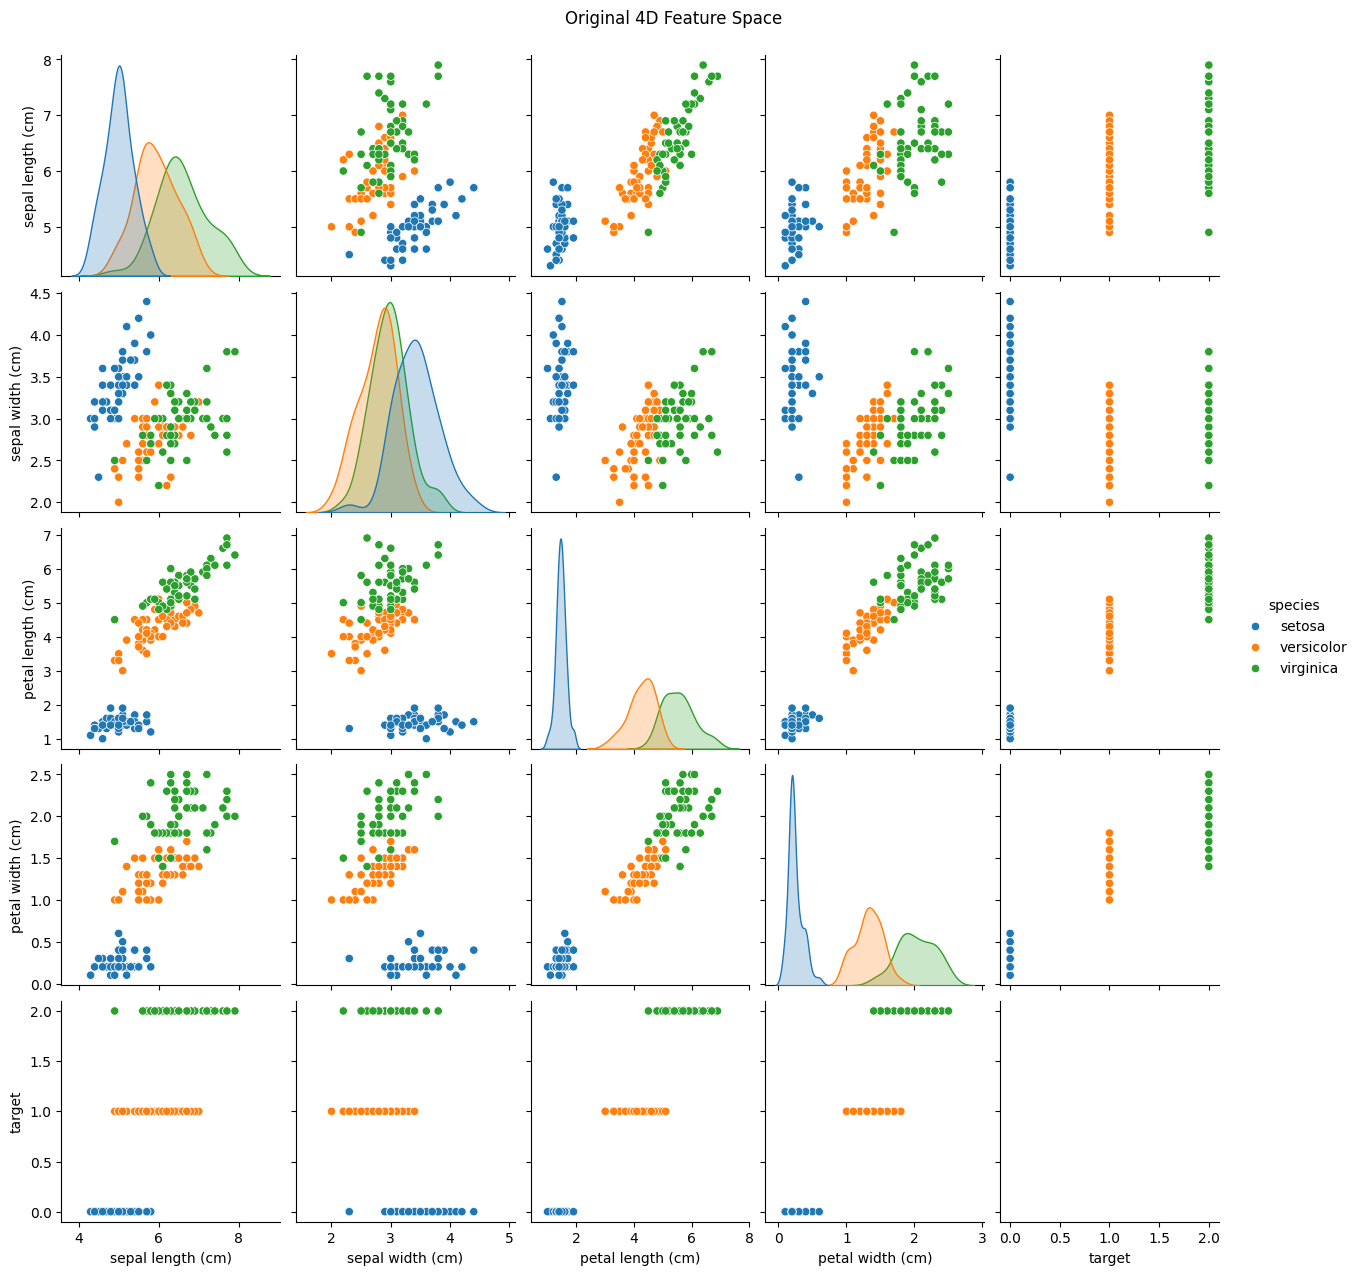

In [11]:
# Pairplot to show relationship between all feature pairs
sns.pairplot(df, hue='species', diag_kind='kde') #hue--identify patterns and clusters using colour coding
plt.suptitle("Original 4D Feature Space", y=1.02)
plt.show()

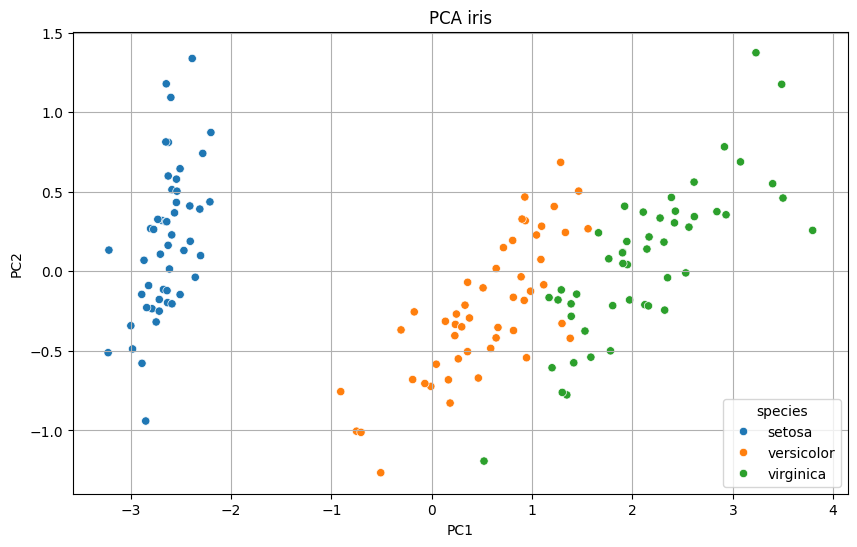

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_pca,x='PC1',y='PC2',hue='species')
plt.title('PCA iris')
plt.grid(True)
plt.show()

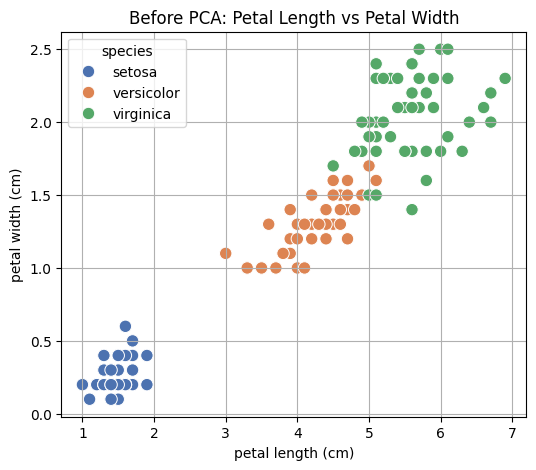

In [13]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species', palette='deep', s=80)
plt.title("Before PCA: Petal Length vs Petal Width")
plt.grid(True)
plt.show()

## t-SNE (t-distributed Stochastic Neighbor Embedding)
t-SNE is a non-linear dimensionality reduction technique useful for visualizing high-dimensional datasets by converting similarities into joint probabilities.

In [15]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)


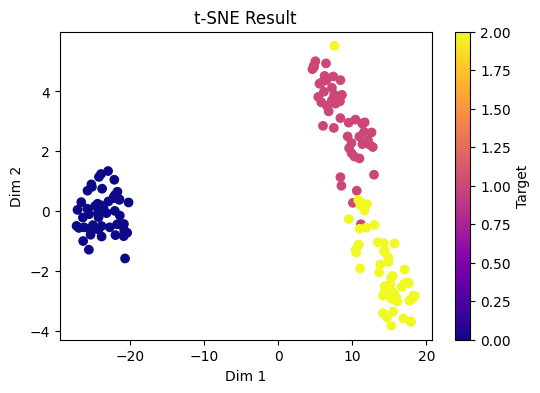

In [23]:
# Plot t-SNE result
plt.figure(figsize=(6, 4))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='plasma')
plt.title('t-SNE Result')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.colorbar(label='Target')
plt.show()

Feature|	PCA (Principal Component Analysis)|	t-SNE (t-distributed Stochastic Neighbor Embedding)|
Type	Linear Dimensionality Reduction	Non-linear Dimensionality Reduction
Goal	Maximize global variance	Preserve local structure (neighborhoods)
Mathematical Base	Eigenvectors and eigenvalues of covariance matrix	Probabilistic similarity distributions
Preserves	Large/global patterns in data	Local clusters and similarities
Axes Meaning	PC1, PC2, etc. have real-world meaning (variance explained)	Axes are abstract; no direct interpretation
Reproducibility	Deterministic (same result every time)	Stochastic (results vary unless random_state is fixed)
Performance	Fast, even on large datasets	Slower, especially for large datasets
Use Case	Feature reduction, preprocessing, visualization	Purely for visualization and exploration
Output Dimensions	You choose (e.g., 2 or 3)	Usually 2 or 3 for plotting
New Data	Can transform new data using fitted PCA	Cannot transform new data (non-parametric)

In [ ]:
The eigenvectors of the covariance matrix of your data
The eigenvalues tell you how much variance is in that direction